## Predict Boston Housing median value

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
print(tf.__version__)
## ! pip install git+https://github.com/tensorflow/docs

2.3.0


###  Import data
The Boston Housing dataset is recently archived in the UCI Machine Learning Repository. However,the dataset is still accessible in scikit-learn datasets.

In [110]:
boston=load_boston()
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
dataset = pd.DataFrame(boston.data, columns=column_names)
dataset.tail() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [111]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Clean the data

In [112]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [113]:
dataset.drop(['CHAS','RAD'], inplace=True, axis=1)
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [114]:
target = pd.DataFrame(boston.target, columns=["MEDV"])
target.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


### Prepare the data

In [115]:
datasetF = pd.concat([dataset,target], axis=1)
datasetF.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


### Split into train and test

In [116]:
train_dataset = datasetF.sample(frac=0.8,random_state=0)
test_dataset = datasetF.drop(train_dataset.index)

In [117]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000
PTRATIO,405.0,18.437037,2.141275,12.60000,17.30000,18.80000,20.20000,22.0000
B,405.0,356.276444,91.298597,2.60000,375.21000,391.23000,396.24000,396.9000


### Split features from labels

In [118]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

In [119]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Build model

In [120]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mae', 'mse'])
  return model

In [121]:
model = build_model()

In [122]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [133]:
# train the model for 999 epochs and record the accuracy in the history
EPOCHS = 999

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9.5453,  mae:2.1476,  mse:9.5453,  val_loss:13.4611,  val_mae:2.5172,  val_mse:13.4611,  
....................................................................................................
Epoch: 100, loss:6.3174,  mae:1.8080,  mse:6.3174,  val_loss:13.0978,  val_mae:2.5785,  val_mse:13.0978,  
....................................................................................................
Epoch: 200, loss:4.0424,  mae:1.4095,  mse:4.0424,  val_loss:12.1694,  val_mae:2.5853,  val_mse:12.1694,  
....................................................................................................
Epoch: 300, loss:2.8830,  mae:1.2203,  mse:2.8830,  val_loss:12.1560,  val_mae:2.6639,  val_mse:12.1560,  
....................................................................................................
Epoch: 400, loss:2.1010,  mae:1.0405,  mse:2.1010,  val_loss:13.5763,  val_mae:2.6899,  val_mse:13.5763,  
..............................................................

In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
994,1.004950,0.677207,1.004950,25.041193,2.882980,25.041191,994
995,1.165895,0.777795,1.165895,22.416252,2.748517,22.416252,995
996,1.074285,0.698554,1.074285,29.176279,3.021617,29.176279,996
997,1.041940,0.736859,1.041940,24.881546,2.793680,24.881546,997
998,0.845889,0.616454,0.845889,24.037546,2.878517,24.037546,998


In [125]:
plotM = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MEDV]')

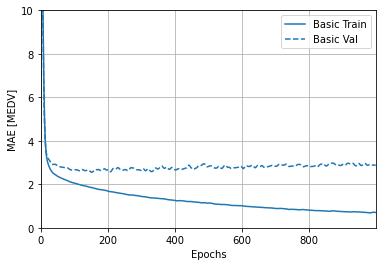

In [126]:
plotM.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MEDV]')

Text(0, 0.5, 'MSE [MEDV^2]')

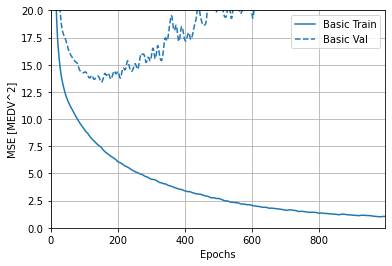

In [127]:
plotM.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MEDV^2]')

In [128]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:529.6284,  mae:21.3091,  mse:529.6284,  val_loss:537.1183,  val_mae:21.3201,  val_mse:537.1183,  
.................................................................................

Text(0, 0.5, 'MAE [MEDV]')

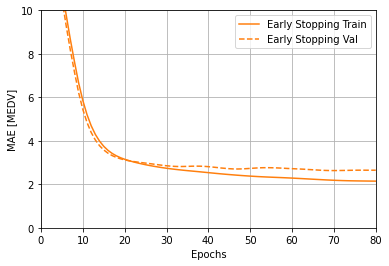

In [129]:
plotM.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MEDV]')

In [130]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Absolute Error: {:5.2f} MEDV".format(mae))

4/4 - 0s - loss: 11.5538 - mae: 2.2163 - mse: 11.5538
Testing set Mean Absolute Error:  2.22 MEDV


### Predict 

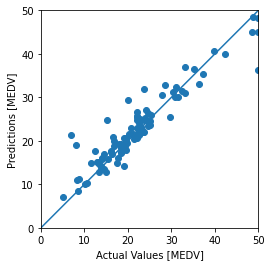

In [131]:
## predict the median prioes using the test data

test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Actual Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

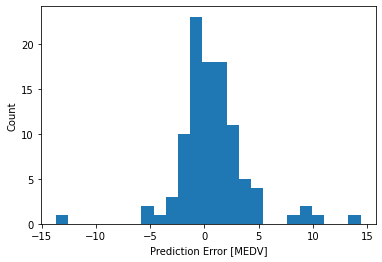

In [132]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

### Conclusions

Mean Squared Error(MSE) is used as the loss function for the regression problem.

To avoid overfitting, a small network with few hidden layers and possibly early stopping are used.